In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [6]:
combined = pd.concat([train,test], ignore_index=True)

In [7]:
combined.shape

(14204, 12)

In [8]:
# Check the info
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [9]:
# Run the summary statistics

combined.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400


### Univariate Analysis

In [10]:
num_vars = combined.select_dtypes(include=np.number).columns
num_vars

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
combined.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [12]:
cat_vars = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
            'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [13]:
len(num_vars)

5

In [14]:
len(cat_vars)

6

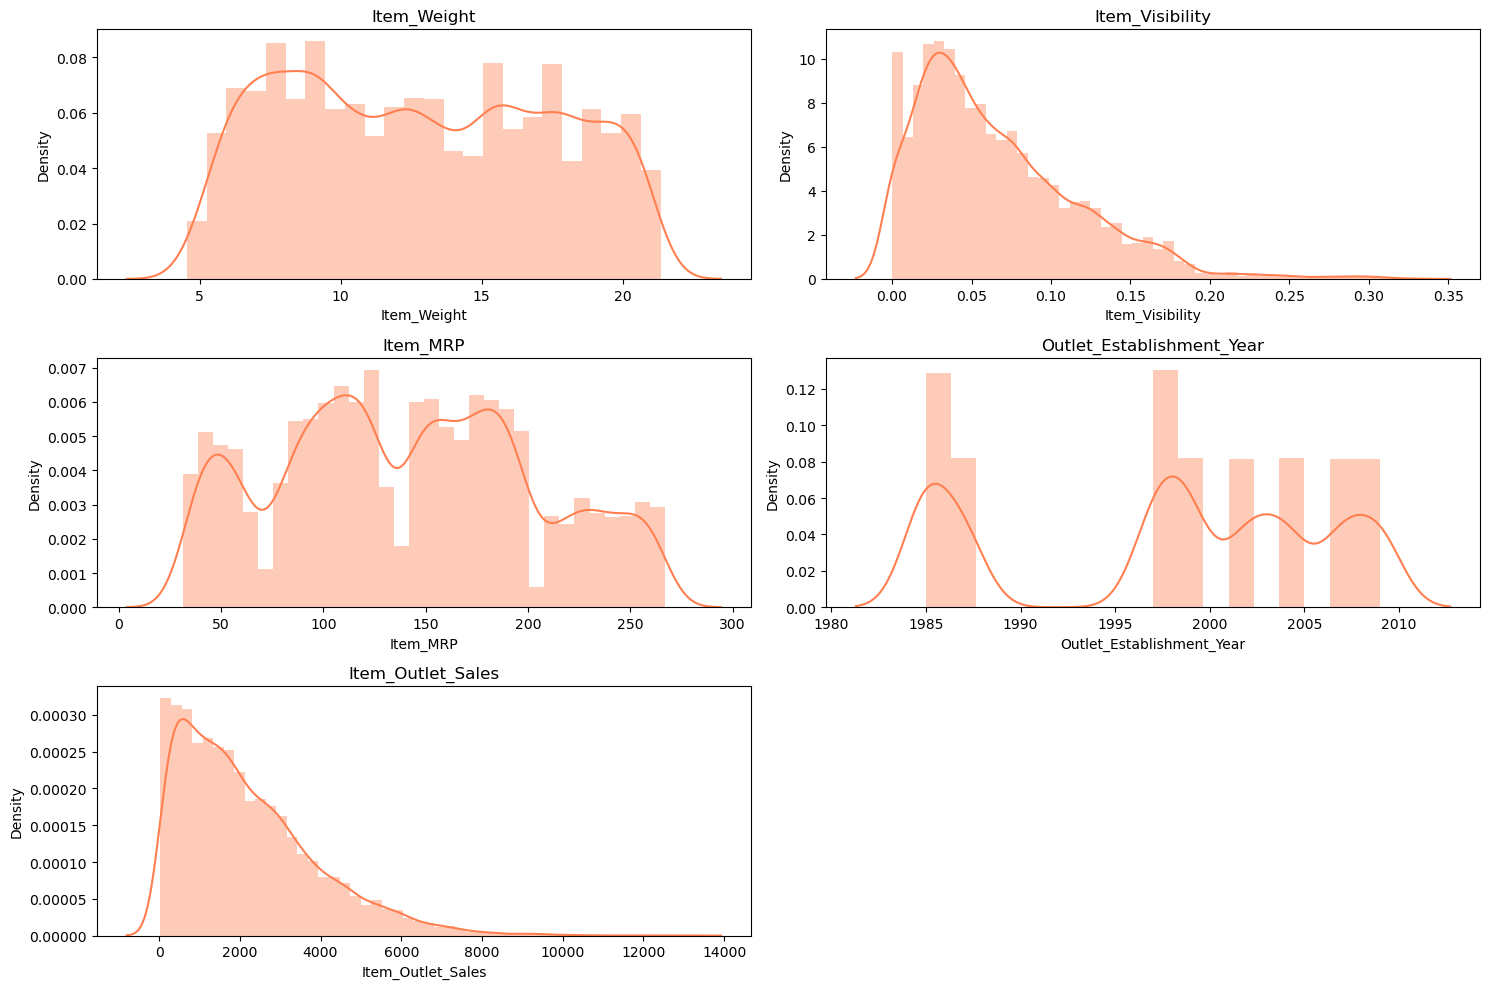

In [15]:
# Plot the numerical variables

nrows = 3
ncols = 2
it = 1

plt.figure(figsize=(15,10))
for i in num_vars:
    plt.subplot(nrows,ncols,it)
    sns.distplot(combined.loc[:,i],color='coral')
    plt.title(i)
    it += 1
plt.tight_layout()
plt.show()

#### Inference

* Target variable (sales) is highly skewed, this means, there are products which have high prices and people are also buying these products

* MRP seems to have bimodal property which means that there is no single price that dominates or drives the sales. There are mutiple price points that are deciding factor of the sales.

* Out_est year is categorical and therefore, no pattern in the distplot.

* Item weight is uniform in nature. It means that the item weight of all the products fall in a certain range giving a feel of uniformity

* Item visibility is skewed, which means some products have higher visibility than the rest

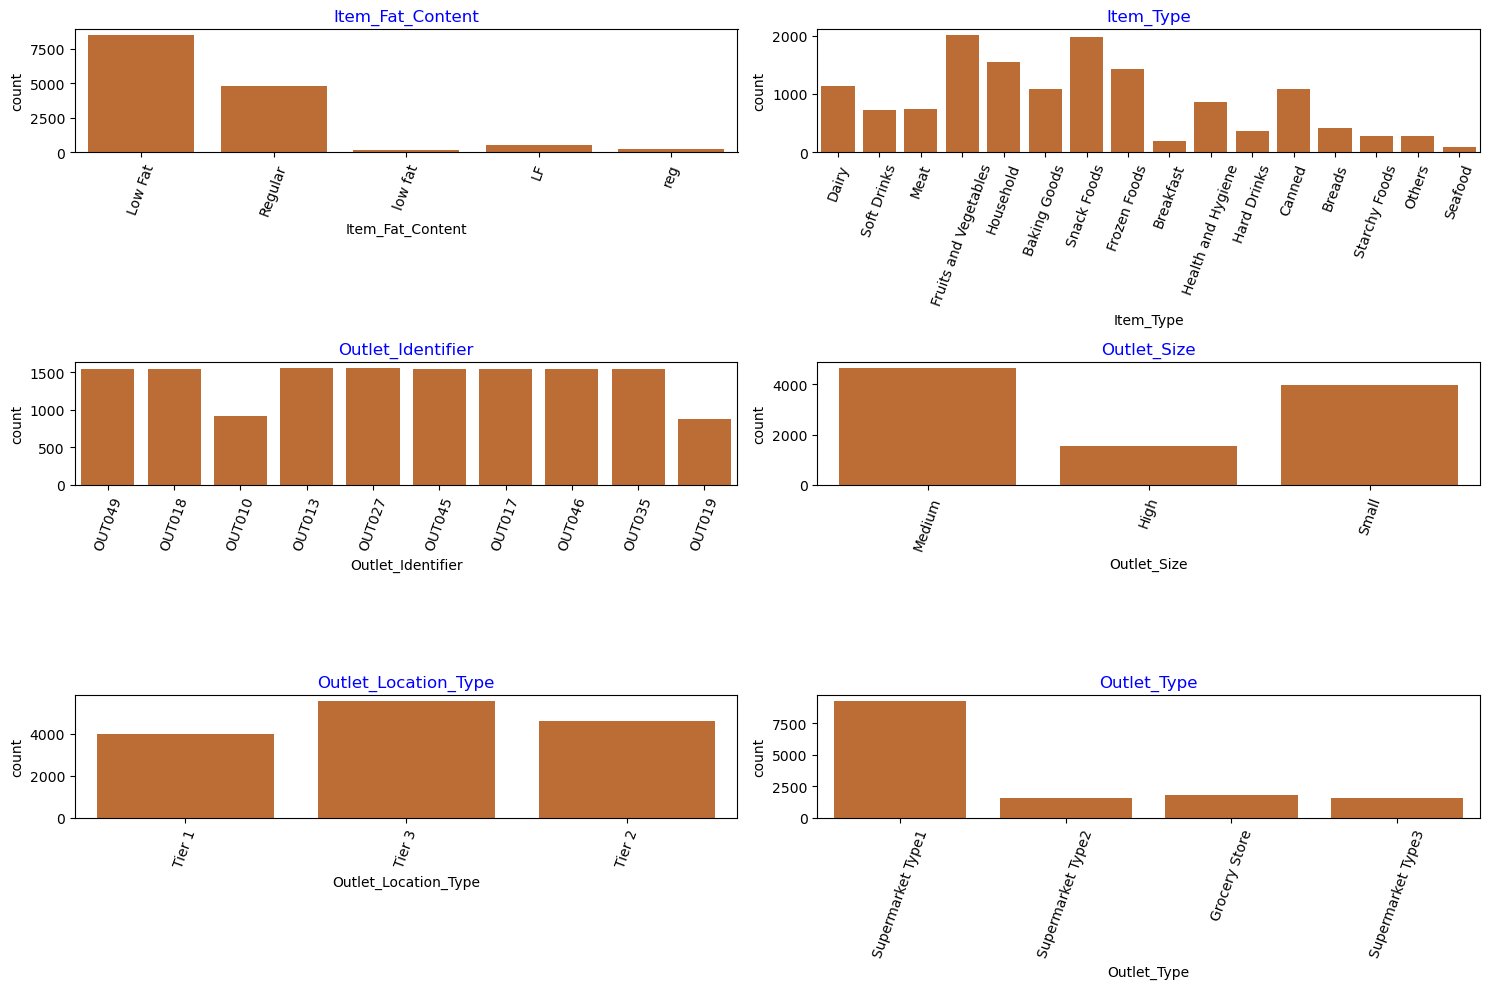

In [16]:
# Cat data

nrows = 3
ncols = 2
rep = 1

plt.figure(figsize=(15,10))
for i in cat_vars:
    plt.subplot(nrows,ncols,rep)
    sns.countplot(combined.loc[:,i],color = 'chocolate')
    plt.title(i,color='blue')
    plt.xticks(rotation=70)
    rep += 1
plt.tight_layout()
plt.show()

In [17]:
# Item Type

print('Top 5 items:',combined.Item_Type.value_counts()[:5].index)

Top 5 items: Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy'],
      dtype='object')


<AxesSubplot:>

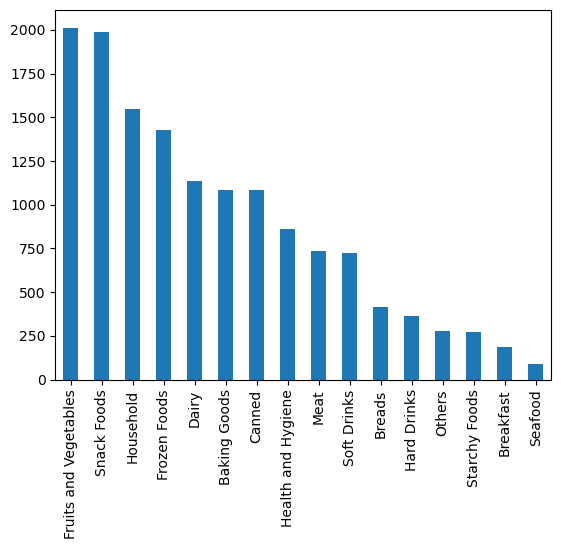

In [18]:
combined.Item_Type.value_counts().plot(kind='bar')

<AxesSubplot:>

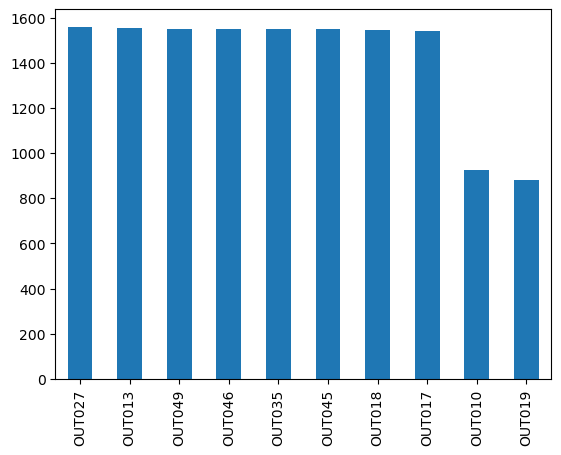

In [19]:
combined.Outlet_Identifier.value_counts().plot(kind='bar')

# Two outlets having lowest frequency : OUT010, OUT019


In [20]:
# Fix the item fat content

combined.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [21]:
combined.Item_Fat_Content.replace(to_replace=['LF','low fat','reg'],
                                 value=['Low Fat','Low Fat','Regular'],
                                 inplace=True)

In [22]:
combined.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

## Bivariate Analysis

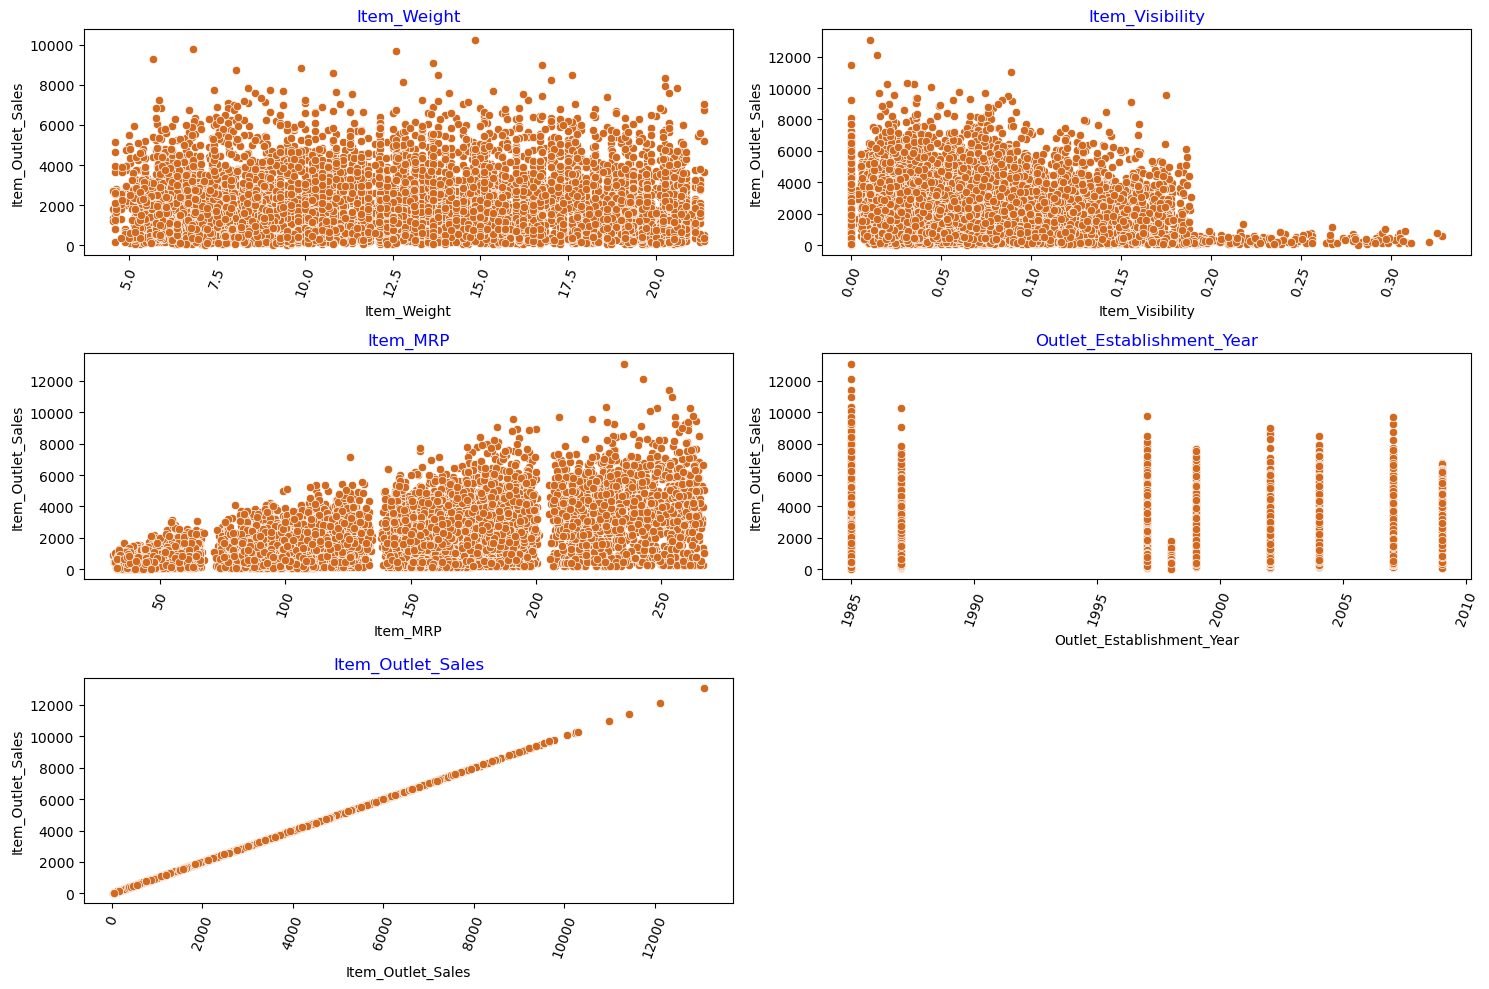

In [23]:
nrows = 3
ncols = 2
rep = 1

plt.figure(figsize=(15,10))
for i in num_vars:
    plt.subplot(nrows,ncols,rep)
    sns.scatterplot(combined.loc[:,i],combined.Item_Outlet_Sales,color = 'chocolate')
    plt.title(i,color='blue')
    plt.xticks(rotation=70)
    rep += 1
plt.tight_layout()
plt.show()

### Infernces

### Missing Values

* There are 3 features which have missing values - Item Visibility(0s), Item_Weight & Outlet_Size.

In [24]:
# generate the list of missing values

combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [25]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [26]:
combined.groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [27]:
combined['Item_Weight'] = combined.groupby('Item_Identifier')['Item_Weight'].apply(lambda x: x.fillna(x.mean()))

In [28]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [29]:
visible = combined.loc[combined.Item_Visibility==0]

row_in = visible.index
iid = visible.Item_Identifier

for i in row_in:
    combined.loc[i,"Item_Visibility"] = combined.loc[combined.Item_Identifier==iid[i],"Item_Visibility"].median()


In [30]:
pd.DataFrame(combined.groupby(['Outlet_Type'])['Outlet_Size'].value_counts())

Outlet_Size
Outlet_Type       Outlet_Size             
Grocery Store     Small                880
Supermarket Type1 Small               3100
                  High                1553
                  Medium              1550
Supermarket Type2 Medium              1546
Supermarket Type3 Medium              1559

In [31]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [32]:
# Imputting small where Outlet type is grocery

combined.loc[(combined.Outlet_Type=='Grocery Store') & (combined.Outlet_Size.isnull()),
            'Outlet_Size'] = 'Small'

In [33]:
combined.groupby('Outlet_Type')['Outlet_Identifier'].value_counts()

Outlet_Type        Outlet_Identifier
Grocery Store      OUT010                925
                   OUT019                880
Supermarket Type1  OUT013               1553
                   OUT035               1550
                   OUT046               1550
                   OUT049               1550
                   OUT045               1548
                   OUT017               1543
Supermarket Type2  OUT018               1546
Supermarket Type3  OUT027               1559
Name: Outlet_Identifier, dtype: int64

In [34]:
combined.groupby('Outlet_Identifier')['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Size
OUT010             Small           925
OUT013             High           1553
OUT018             Medium         1546
OUT019             Small           880
OUT027             Medium         1559
OUT035             Small          1550
OUT046             Small          1550
OUT049             Medium         1550
Name: Outlet_Size, dtype: int64

In [35]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Identifier'].unique()

array(['OUT045', 'OUT017'], dtype=object)

In [36]:
combined.loc[combined.Outlet_Size.isnull(),['Outlet_Type','Outlet_Location_Type']].value_counts()

Outlet_Type        Outlet_Location_Type
Supermarket Type1  Tier 2                  3091
dtype: int64

In [37]:
combined.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Identifier'].value_counts()

Outlet_Type        Outlet_Location_Type  Outlet_Identifier
Grocery Store      Tier 1                OUT019                880
                   Tier 3                OUT010                925
Supermarket Type1  Tier 1                OUT046               1550
                                         OUT049               1550
                   Tier 2                OUT035               1550
                                         OUT045               1548
                                         OUT017               1543
                   Tier 3                OUT013               1553
Supermarket Type2  Tier 3                OUT018               1546
Supermarket Type3  Tier 3                OUT027               1559
Name: Outlet_Identifier, dtype: int64

In [38]:
combined.loc[(combined.Outlet_Type=='Supermarket Type1') & (combined.Outlet_Size.isnull()),
            'Outlet_Size'] = 'Small'

<AxesSubplot:>

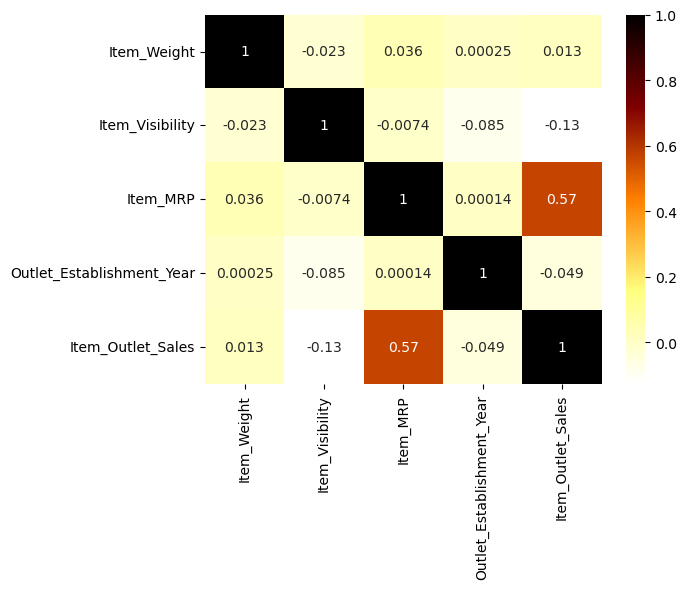

In [39]:
# generate the correlation plot

sns.heatmap(combined.corr(),annot=True,cmap='afmhot_r')

### Outlier Identification

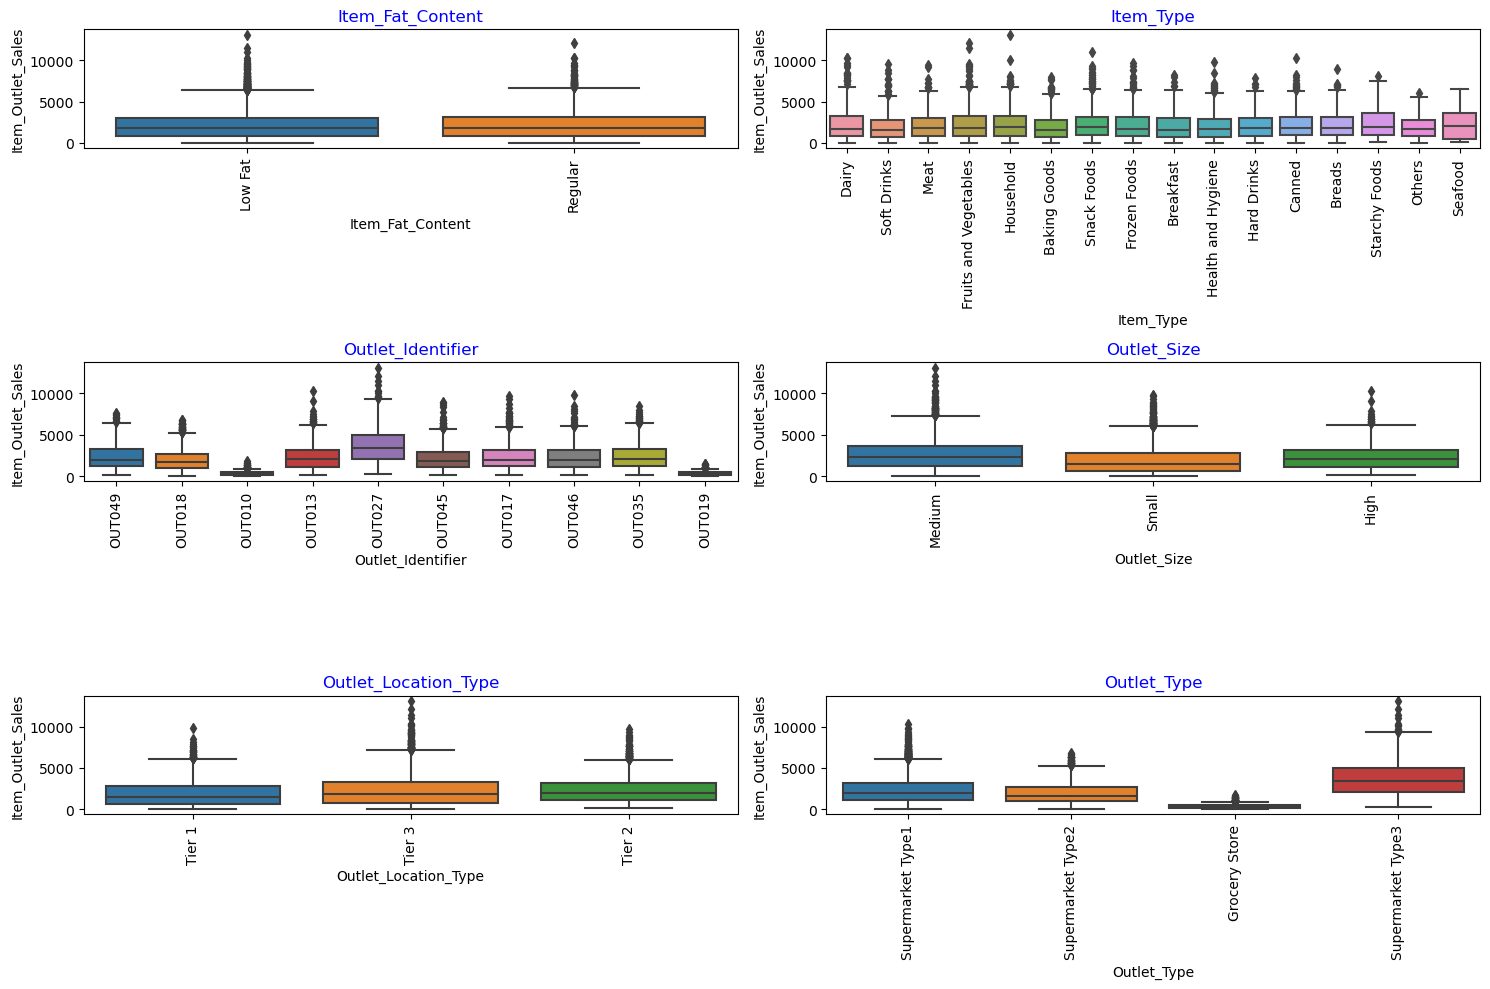

In [40]:
nrows = 3
ncols = 2
rep = 1

plt.figure(figsize=(15,10))
for i in cat_vars:
    plt.subplot(nrows,ncols,rep)
    sns.boxplot(combined.loc[:,i],combined.Item_Outlet_Sales)
    plt.title(i,color='blue')
    plt.xticks(rotation=90)
    rep += 1
plt.tight_layout()
plt.show()

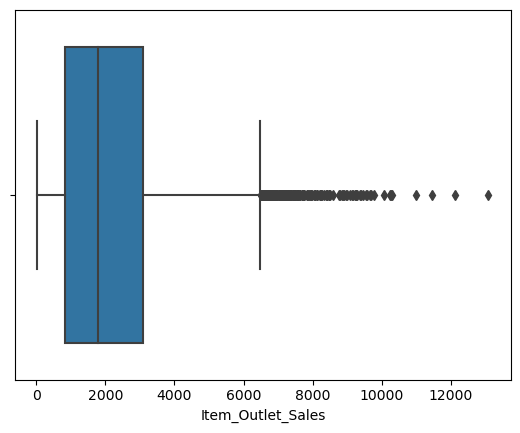

In [41]:
sns.boxplot(combined.Item_Outlet_Sales)
plt.show()

In [42]:
q1 = combined.quantile(0.25)
q3 = combined.quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr
wt_ot = combined.loc[~((combined<ll)| (combined>ul)).any(axis=1)]

In [43]:
wt_ot.shape

(13766, 12)

<AxesSubplot:>

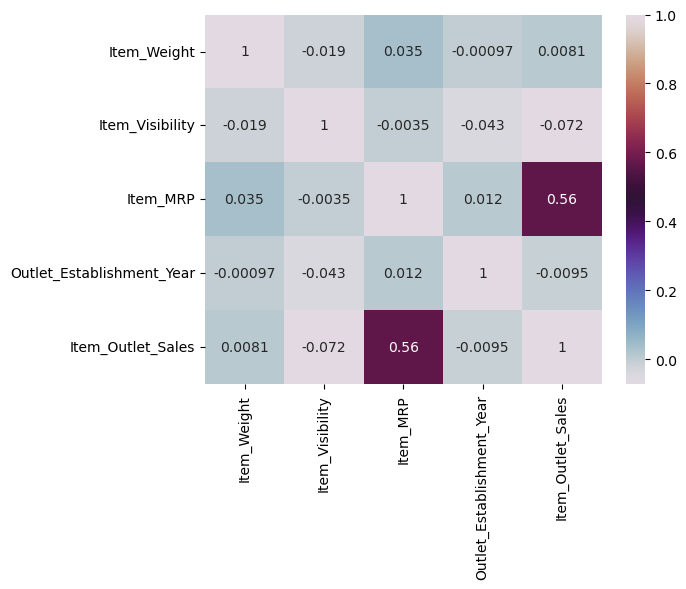

In [44]:
sns.heatmap(wt_ot.corr(),annot=True,cmap='twilight')

### Winsorization

In [45]:
from scipy.stats.mstats import winsorize

In [46]:
new = combined.copy()
for i in combined.columns:
    winsorized_data = winsorize(combined.loc[:,i], limits=(0.01,0.01))
    new[i+"_Winsorized"] = winsorized_data

<AxesSubplot:>

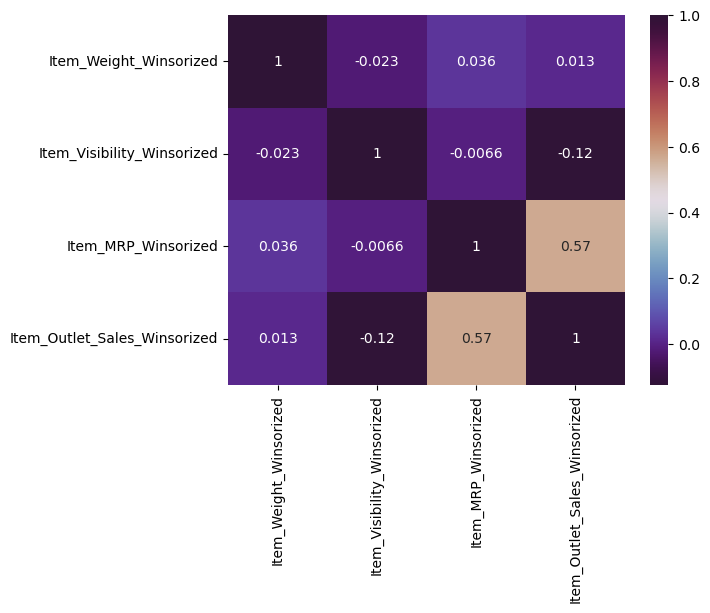

In [47]:
cols= ['Item_Weight_Winsorized','Item_Visibility_Winsorized','Item_MRP_Winsorized', 'Outlet_Identifier_Winsorized',
       'Item_Outlet_Sales_Winsorized']

sns.heatmap(new.loc[:,cols].corr(),annot=True,cmap='twilight_shifted')

In [48]:
# Not much improvement, hence, going forward with the original data

## Feature Engineering

In [49]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [50]:
# Extract the first two letters from Item ID
combined.Item_Identifier[0][:2]

'FD'

In [51]:
ids = []
for i in combined.Item_Identifier:
    ids.append(i[:2])

In [52]:
combined['Item_IDs'] = pd.Series(ids)

In [53]:
# Where it is NC in item ids, we will replace low fat to non-edible for IFC

combined.loc[(combined.Item_IDs=='NC') & \
             (combined.Item_Fat_Content==\
             'Low Fat'), "Item_Fat_Content"] = "Non Edible"

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

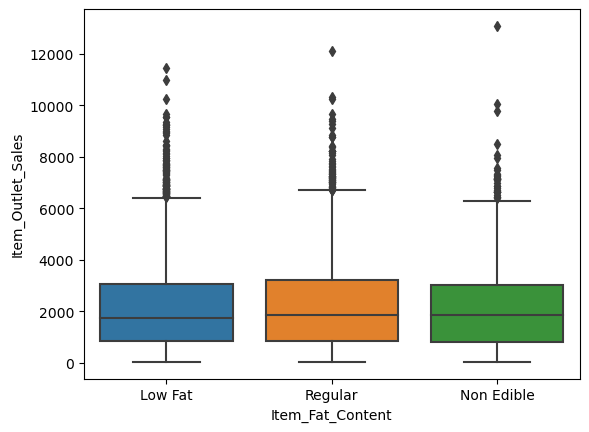

In [54]:
sns.boxplot(combined.Item_Fat_Content,combined.Item_Outlet_Sales)

In [55]:
# Convert the Item Type to perishable & non-perishable

combined.Item_Type.unique()


array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [56]:
perishables = ['Dairy','Meat','Fruits and Vegetables','Breakfast','Breads','Seafood']

In [57]:
def perish(x):
    if x in perishables:
        return('Perishable')
    else:
        return('Non Preishable')

In [58]:
combined['Item_Type_Cat'] = combined.Item_Type.apply(perish)

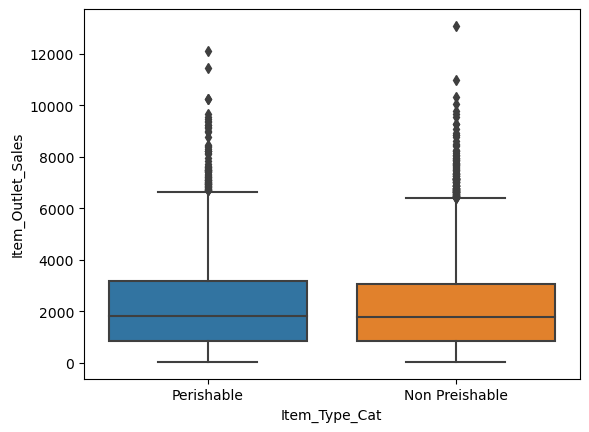

In [59]:
sns.boxplot(combined.Item_Type_Cat,combined.Item_Outlet_Sales)
plt.show()

In [60]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDs,Item_Type_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Preishable


In [61]:
# price per unit

combined['Price_per_unit'] = combined.Item_MRP/combined.Item_Weight

In [62]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDs,Item_Type_Cat,Price_per_unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Preishable,8.153581


In [63]:
# Vintage of the outlet
combined['Vintage'] = 2013 - combined.Outlet_Establishment_Year

In [64]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDs,Item_Type_Cat,Price_per_unit,Vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,26.861204,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Preishable,8.153581,4


<AxesSubplot:>

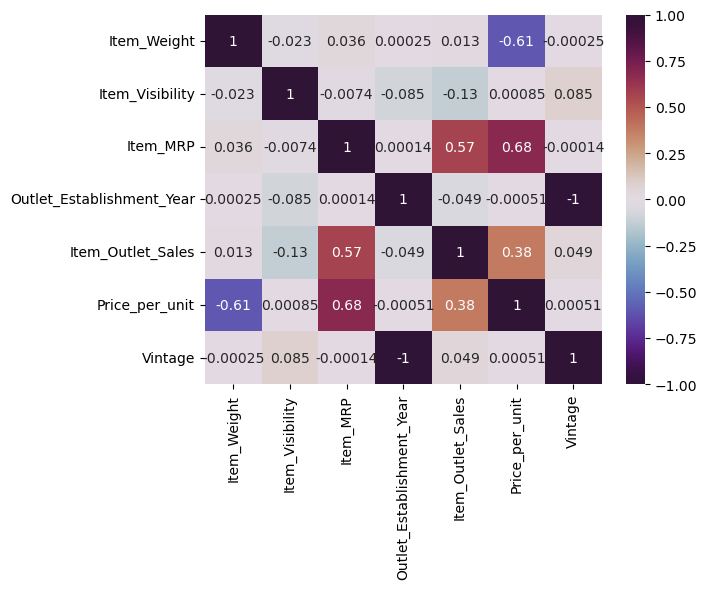

In [71]:
sns.heatmap(combined.corr(), annot = True, cmap = 'twilight_shifted')

In [72]:
# Outlets - Target Encoding
combined['magic1'] = combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('mean')
combined['magic2'] = combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('median')
combined['magic3'] = combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('nunique')
combined['magic4'] = combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('std')

In [77]:
combined['magic5'] = combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('min')
combined['magic6'] = combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('max')

In [79]:
combined['magic7'] = combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('mean')
combined['magic8'] = combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('median')
combined['magic9'] = combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('nunique')
combined['magic10'] = combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('std')
combined['magic11'] = combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('min')
combined['magic12'] = combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('max')

<AxesSubplot:>

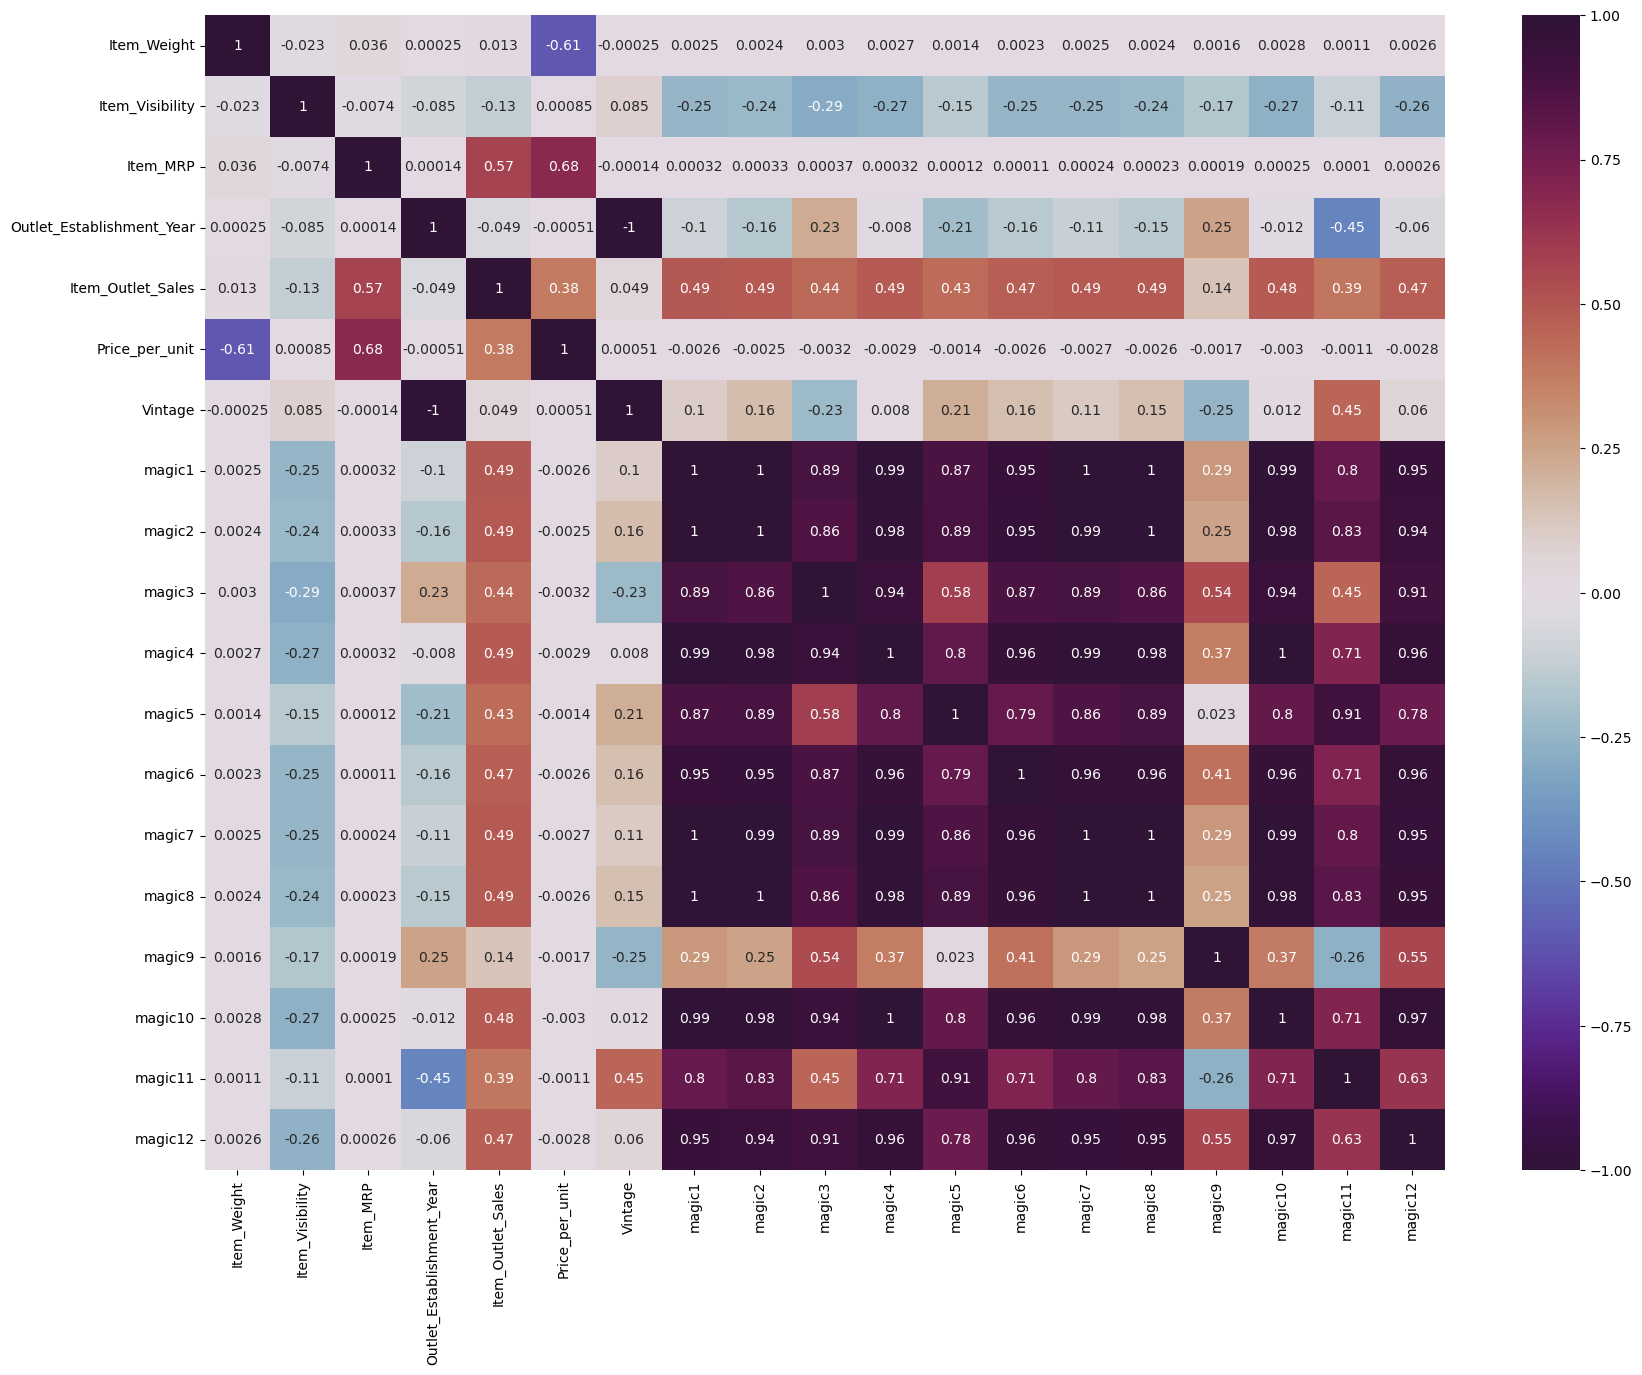

In [81]:
plt.figure(figsize=(20,15))
sns.heatmap(combined.corr(), annot=True, cmap='twilight_shifted')

In [84]:
# Drop the features that we do not need

new = combined.drop(['Item_Identifier','Item_Type','Outlet_Identifier',
               'Outlet_Establishment_Year'],axis=1)

In [87]:
# Split the data in train and test

newtrain = new.loc[0:train.shape[0]-1,:]
newtest = new.loc[train.shape[0]:,:]

newtrain.shape, newtest.shape

((8523, 24), (5681, 24))

In [88]:
X = newtrain.drop('Item_Outlet_Sales',axis=1)
y = newtrain.Item_Outlet_Sales

newtest = newtest.drop('Item_Outlet_Sales',axis = 1)

### Statistical Analysis

In [86]:
import scipy.stats as stats

In [90]:
# Two sample ttest on num vars

num = X.select_dtypes(include=np.number).columns

In [91]:
for i in num:
    teststats, pval = stats.ttest_ind(newtrain.loc[:,i],
                                     newtrain.Item_Outlet_Sales)
    print('Pvalue for',i,'var is',pval)

Pvalue for Item_Weight var is 0.0
Pvalue for Item_Visibility var is 0.0
Pvalue for Item_MRP var is 0.0
Pvalue for Price_per_unit var is 0.0
Pvalue for Vintage var is 0.0
Pvalue for magic1 var is 0.9999999999999825
Pvalue for magic2 var is 3.1784715029457972e-49
Pvalue for magic3 var is 0.0
Pvalue for magic4 var is 0.0
Pvalue for magic5 var is 0.0
Pvalue for magic6 var is 0.0
Pvalue for magic7 var is 1.0
Pvalue for magic8 var is 3.389157119244379e-48
Pvalue for magic9 var is 3.3373511221478586e-18
Pvalue for magic10 var is 0.0
Pvalue for magic11 var is 0.0
Pvalue for magic12 var is 0.0


In [92]:
# Dropping the insignificant variables
X.drop(['magic1','magic7'],axis = 1, inplace = True)

In [93]:
newtest.drop(['magic1','magic7'],axis = 1, inplace = True)

In [96]:
# Item Fat Content and others
import statsmodels.formula.api as sfa

model = sfa.ols("Item_Outlet_Sales~Item_Fat_Content+Outlet_Size+Outlet_Location_Type+\
Outlet_Type+Item_IDs+Item_Type_Cat",data=newtrain).fit()

In [98]:
from statsmodels.stats.anova import anova_lm

In [99]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Item_Fat_Content,2.0,9.201502e+06,4.600751e+06,2.080158,1.249739e-01
Outlet_Size,2.0,1.184389e+09,5.921943e+08,267.751503,1.692967e-113
Outlet_Location_Type,2.0,1.419529e+09,7.097646e+08,320.909102,4.323114e-135
Outlet_Type,3.0,3.343020e+09,1.114340e+09,503.831548,2.168788e-301
Item_IDs,2.0,2.662183e+07,1.331092e+07,6.018325,2.444112e-03
Item_Type_Cat,1.0,1.199214e+07,1.199214e+07,5.422058,1.990720e-02
Residual,8511.0,1.882404e+10,2.211731e+06,NaN,NaN


In [102]:
X = pd.get_dummies(X, drop_first=True)
newtest = pd.get_dummies(newtest, drop_first=True)

In [103]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

lr = LinearRegression()
rf = RandomForestRegressor()
gbm = GradientBoostingRegressor()
xgb = XGBRegressor()

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [104]:
# Linear Regression

pred = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(lr.fit(xtrain,ytrain).predict(newtest))

In [105]:
predicted = np.abs(pd.DataFrame(pred).T.mean(axis=1))

In [106]:
# Prepare the submission file

submission = pd.DataFrame({'Item_Identfier':test.Item_Identifier,
                          'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':predicted})
submission.head()

,Item_Identfier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1805.708562
1,FDW14,OUT017,1596.744728
2,NCN55,OUT010,1904.810039
3,FDQ58,OUT017,2568.383727
4,FDY38,OUT027,5219.890827


In [107]:
submission.to_csv('Bigmart_lr.csv', index = False) # 1192

In [108]:
# Random Forest Model

pred_rf = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_rf.append(rf.fit(xtrain,ytrain).predict(newtest))

In [109]:
predicted = np.abs(pd.DataFrame(pred_rf).T.mean(axis=1))

submission = pd.DataFrame({'Item_Identfier':test.Item_Identifier,
                          'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':predicted})
submission.head()

,Item_Identfier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1691.893675
1,FDW14,OUT017,1329.389544
2,NCN55,OUT010,833.772019
3,FDQ58,OUT017,2111.725850
4,FDY38,OUT027,6644.225930


In [110]:
submission.to_csv("Bigmart_rf.csv",index=False)  # 1190

In [111]:
# Gradient Boosting Model

pred_gbm = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_gbm.append(gbm.fit(xtrain,ytrain).predict(newtest))

In [115]:
predicted = np.abs(pd.DataFrame(pred_gbm).T.mean(axis=1))

submission = pd.DataFrame({'Item_Identfier':test.Item_Identifier,
                          'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':predicted})
submission.head()

,Item_Identfier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1725.838213
1,FDW14,OUT017,1418.646674
2,NCN55,OUT010,644.940785
3,FDQ58,OUT017,2517.623085
4,FDY38,OUT027,5983.642310


In [116]:
submission.to_csv("Bigmart_gbm.csv",index=False) #1152.828

In [117]:
pred_xgb = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_xgb.append(xgb.fit(xtrain,ytrain).predict(newtest))

In [118]:
predicted = np.abs(pd.DataFrame(pred_xgb).T.mean(axis=1))

submission = pd.DataFrame({'Item_Identfier':test.Item_Identifier,
                          'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':predicted})
submission.head()

,Item_Identfier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1783.825562
1,FDW14,OUT017,1219.695923
2,NCN55,OUT010,763.320923
3,FDQ58,OUT017,2562.126953
4,FDY38,OUT027,6379.538086


In [119]:
submission.to_csv("Bigmart_xgb.csv",index=False)